## Análisis de datos - Clase 3

### Datos faltantes

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [620]:
# Cargamos el dataset de Titanic de Seaborn y el dataset de calidad del aire de Statsmodels
titanic_df = sns.load_dataset('titanic')
airquality_df = sm.datasets.get_rdataset("airquality", "datasets").data # Este lo usaremos como ejemplo de datos temporales

# Le pongo un indice de tipo fechas simplemente porque después lo voy a necesitar para el análisis con missingno
airquality_df.index = pd.date_range(start='1973-05-01', end='1973-09-30', freq='D') # Fecha en formato YYYY-MM-DD


In [621]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [622]:
airquality_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1973-05-01,41.0,190.0,7.4,67,5,1
1973-05-02,36.0,118.0,8.0,72,5,2
1973-05-03,12.0,149.0,12.6,74,5,3
1973-05-04,18.0,313.0,11.5,62,5,4
1973-05-05,NaN,NaN,14.3,56,5,5


### 1. Identificación de datos faltantes
---

#### 1.1 Recuento de faltantes: Isnull o Isna?

In [623]:
titanic_df.isnull()  # DataFrame booleano

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [624]:
# Hace lo mismo, es más moderno y el recomendado por Pandas (isnull sigue funcionando pero es considerado legacy)
titanic_df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [625]:
# Contar la proporción de valores nulos en cada columna
titanic_df.isna().sum()  

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [626]:
# Calcular la proporció de de valores nulos en cada columna
titanic_df.isna().mean().round(4)*100  # round(4) redondea a 4 decimales

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64

In [627]:
airquality_df.isna().mean().round(4)*100

Ozone      24.18
Solar.R     4.58
Wind        0.00
Temp        0.00
Month       0.00
Day         0.00
dtype: float64

#### 1.2. Visualización con biblioteca Missingno


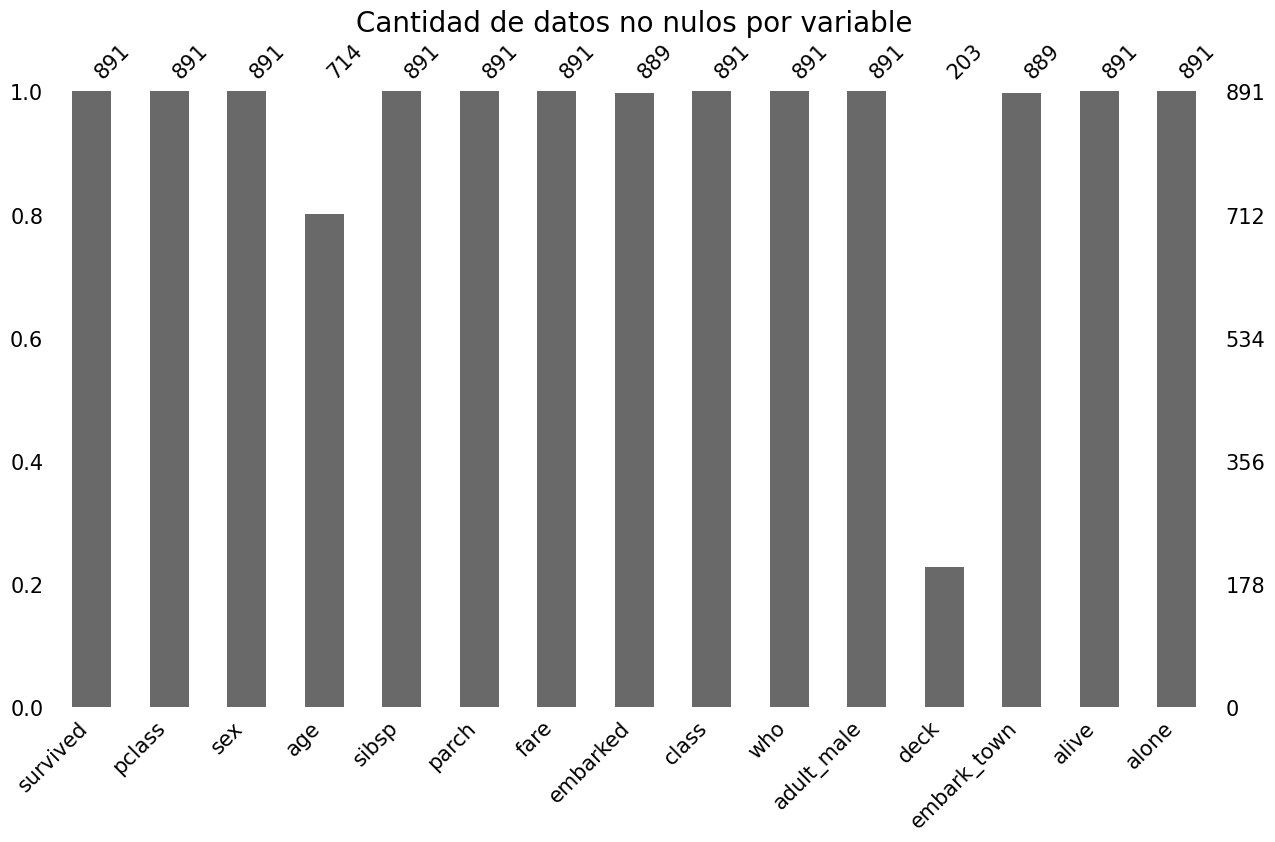

In [628]:
msno.bar(titanic_df, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

<Axes: >

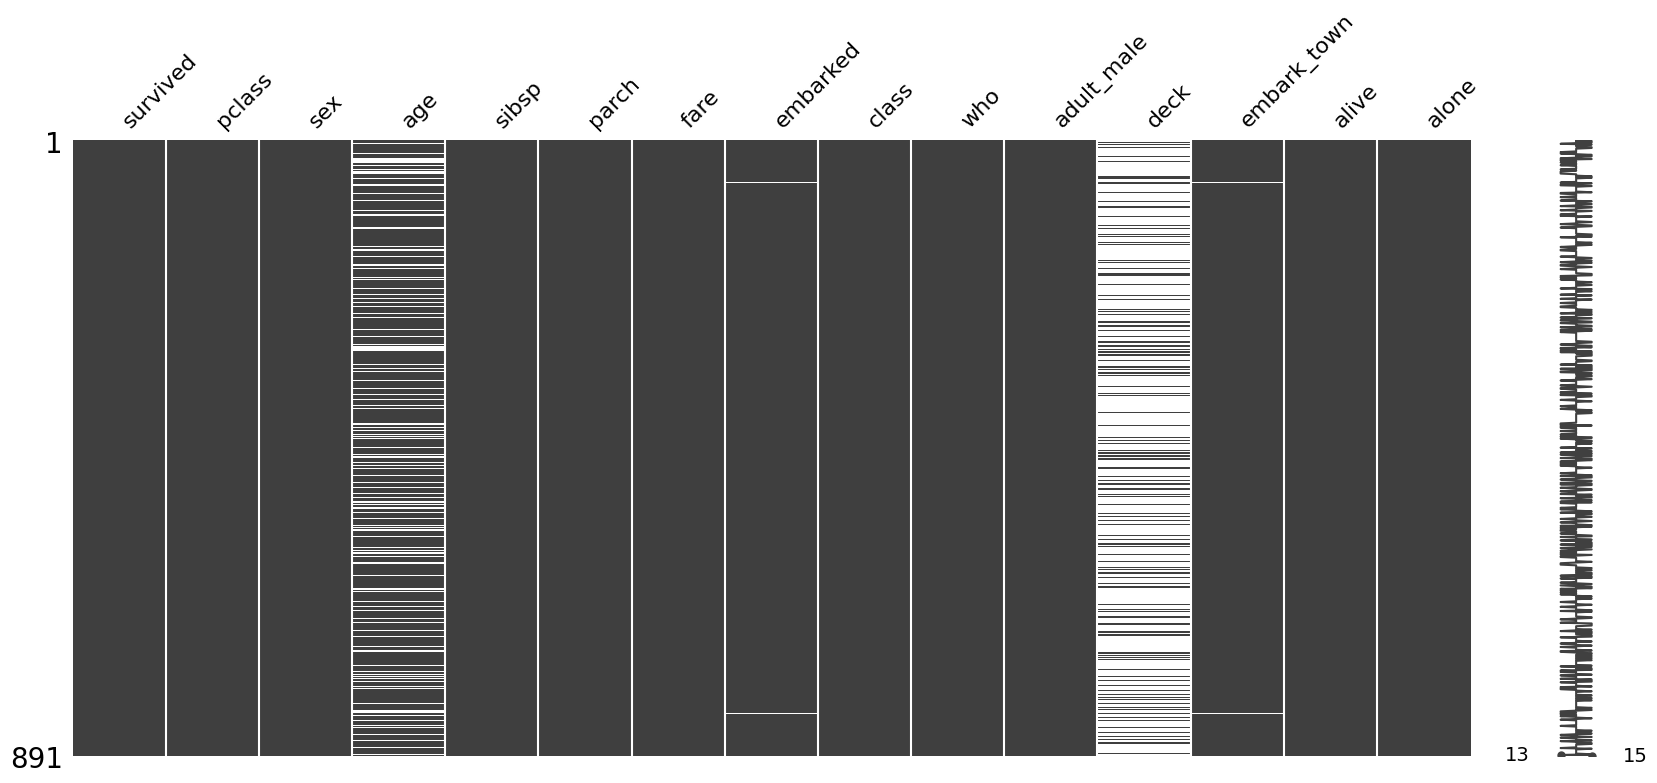

In [629]:
# Matriz de valores faltantes
msno.matrix(titanic_df, figsize=(20,8))

Interpretación:
* La parte sombreada indica datos presentes y las partes blancas los faltantes.
* El gráfico de la derecha (se llama sparkline y se puede deshabilitar con sparkline = False) muestra la completitud de los datos por cada fila y resalta la variación entre su valor mínimo (en este caso, como mínimo hay datos en 13 de las 15 filas) y máximo (está todas las 15 filas completas).

<Axes: >

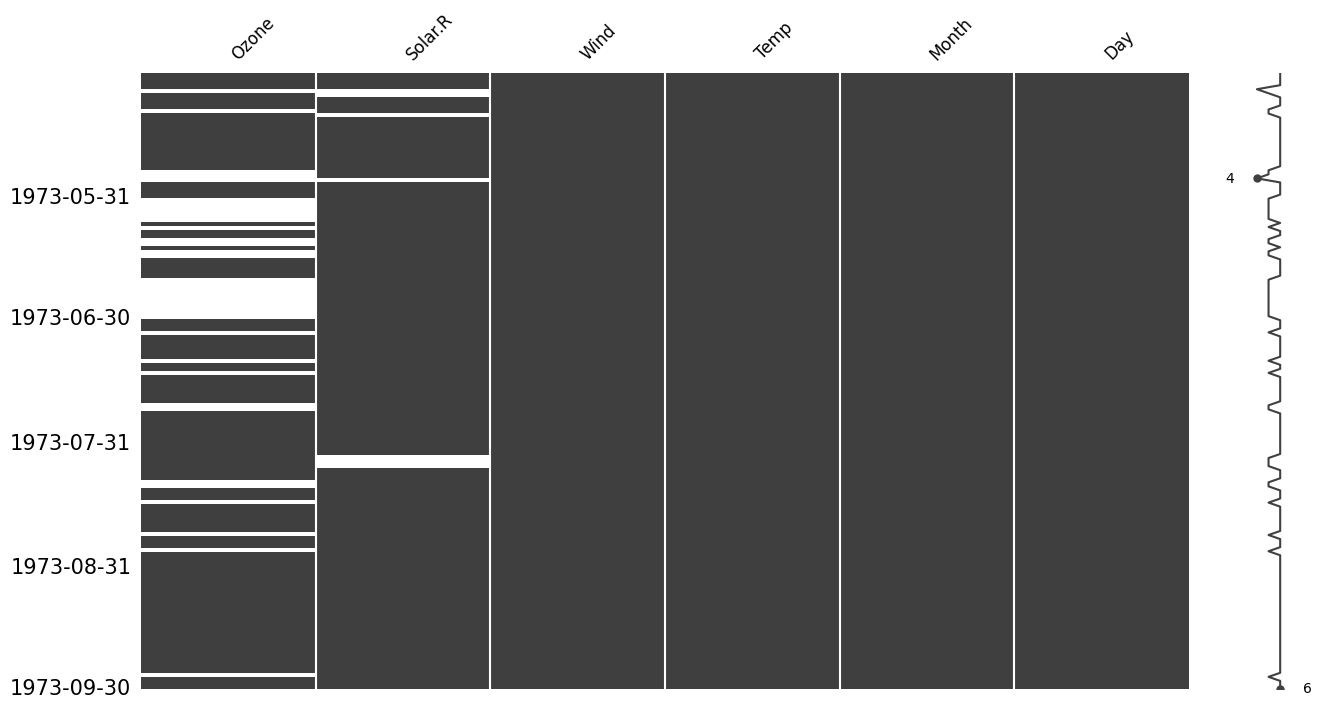

In [630]:
# Por ejemplo en el caso de series temporales, puedo organizar los datos por mes para ver si hay algún patrón
msno.matrix(airquality_df, freq='M', figsize=(15,8), fontsize=12)

<Axes: >

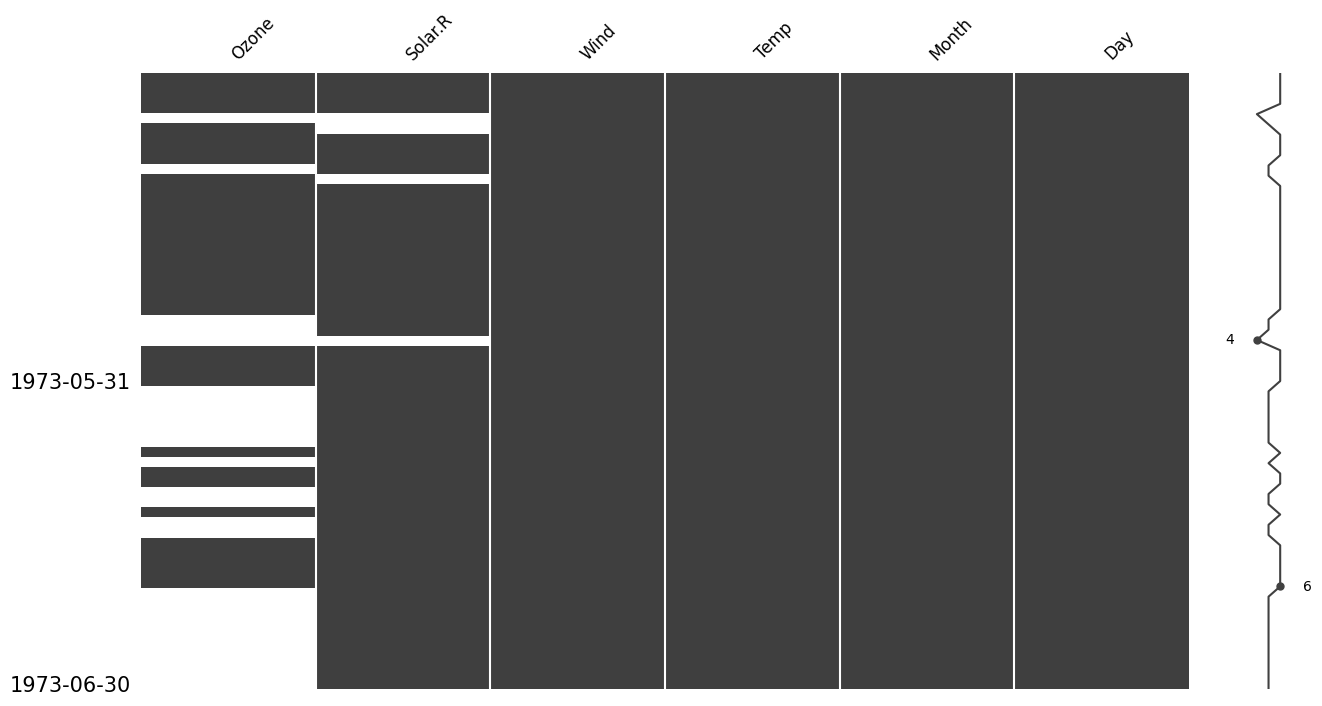

In [631]:
msno.matrix(airquality_df.loc['May-1973':'June-1973'], freq='M', figsize=(15,8), fontsize=12)

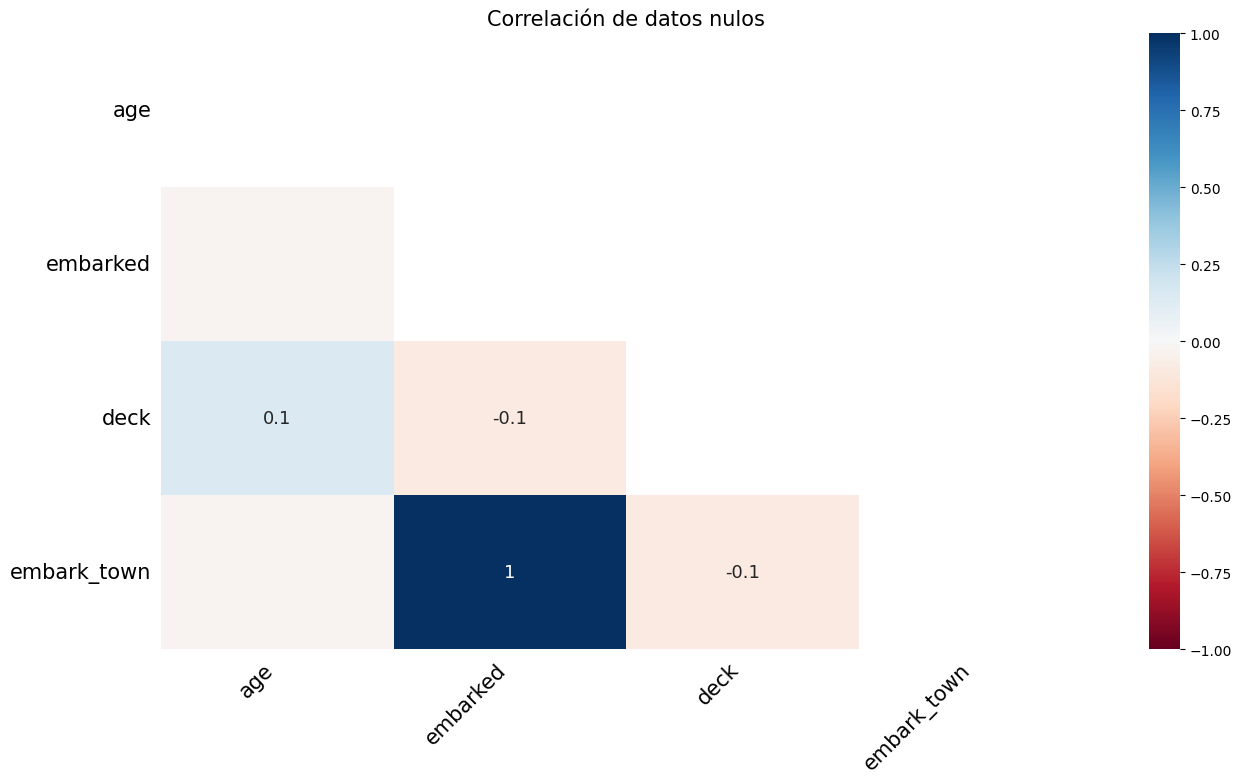

In [632]:
msno.heatmap(titanic_df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

Este gráfico puede ayudar a detectar patrones en los datos faltantes, porque:
* Correlación alta positiva significa que si un valor es nulo en una variable, también lo es en la otra (por ejemplo embarked and embark_town).
* Correlación alta negativa significa que si un valor es nulo en una variable, el otro no lo es.

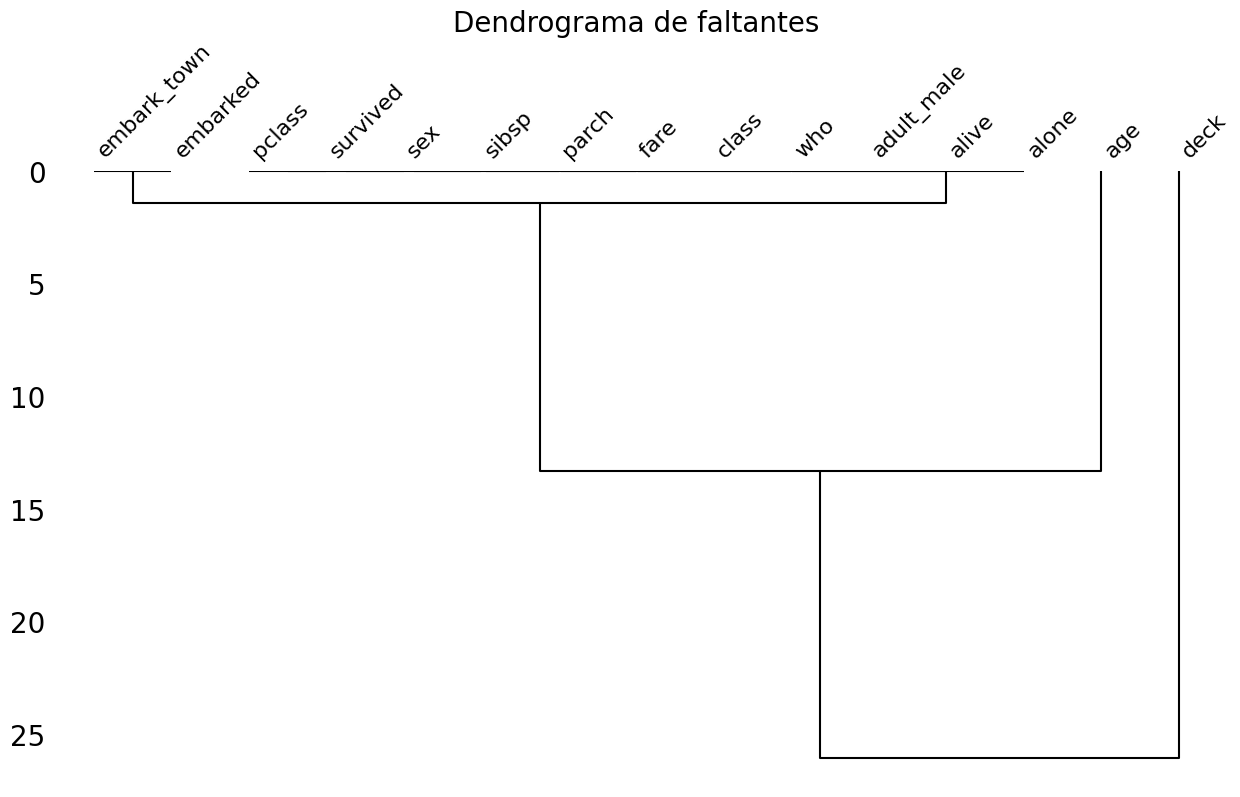

In [633]:

msno.dendrogram(titanic_df, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

Interpretación:

* Las variables se agrupan en clusters (usa un [algortimo de clustering jerárquico](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) basado en correlación de nulos) que tienen patrones de datos faltantes similares. En este caso vemos 4 clusters.

* Se lee desde arriba hacia abajo. El eje vertical representa qué tan distinto es el patrón de faltantes (distancia entre clusters). Las variables que están juntas (unidas por una línea en el cero) se "mueven" perfectamente juntas. Todas tienen nulos o no nulos al mismo tiempo, o cuando una tiene nulos las otras no. 

* Los clusters más cercanos indican un patrón de datos faltantes más parecido.


### 2. Análisis de las causas de los datos faltantes

#### Recordemos los mecanismos:

* MCAR: la falta del dato es aleatoria y no depende de ninguna variable.
* MAR: la falta del dato depende de otras variables observadas.
* MNAR: la falta del dato depende de del dato en sí mismo.


#### En el dataset del Titanic, los faltantes en "Age" y "Deck" son los más importantes.

* Deck tiene un 77% de datos faltantes.
* Age tiene un 19% de datos faltantes. 

1) Son MCAR los datos faltantes? una forma simple de ver esto es analizar el porcentaje de faltantes para distintas "tajadas" del dataset. Si los porcentajes son similares, es probable que los datos sean MCAR. Si no, es probable que sean MAR o MNAR.

In [634]:
# Creamos una función para calcular el porcentaje de nulos en una columna, agrupando por una o más columnas
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )
    return agrupar_nulos


In [635]:
# Ejemplos de análisis que podemos hacer para 'age'
nulos_age_por_sex = nulos_por_grupo(titanic_df, 'sex', 'age')
nulos_age_por_class = nulos_por_grupo(titanic_df, 'class', 'age')
nulos_age_por_embarked = nulos_por_grupo(titanic_df, 'embarked', 'age')
nulos_age_por_sex_class = nulos_por_grupo(titanic_df, ['sex', 'class'], 'age')

# Resultados:
print("Nulos en 'age' por sex:\n", nulos_age_por_sex, "\n")
print("Nulos en 'age' por class:\n", nulos_age_por_class, "\n")
print("Nulos en 'age' por embarked:\n", nulos_age_por_embarked, "\n")
print("Nulos en 'age' por sex and class:\n", nulos_age_por_sex_class, "\n")


Nulos en 'age' por sex:
       sex  porcentaje_nulos_age
0  female             16.878981
1    male             21.490468 

Nulos en 'age' por class:
     class  porcentaje_nulos_age
0   First             13.888889
1  Second              5.978261
2   Third             27.698574 

Nulos en 'age' por embarked:
   embarked  porcentaje_nulos_age
0        C             22.619048
1        Q             63.636364
2        S             13.975155 

Nulos en 'age' por sex and class:
       sex   class  porcentaje_nulos_age
0  female   First              9.574468
1  female  Second              2.631579
2  female   Third             29.166667
3    male   First             17.213115
4    male  Second              8.333333
5    male   Third             27.089337 



In [636]:
# Ejemplos de cosas que podemos mirar para 'deck'
nulos_deck_por_class = nulos_por_grupo(titanic_df, 'class', 'deck')  
nulos_deck_por_embarked = nulos_por_grupo(titanic_df, 'embarked', 'deck')

print("Nulos en 'deck' por class:\n", nulos_deck_por_class, "\n")
print("Nulos en 'deck' por embarked:\n", nulos_deck_por_embarked, "\n")

Nulos en 'deck' por class:
     class  porcentaje_nulos_deck
0   First              18.981481
1  Second              91.304348
2   Third              97.556008 

Nulos en 'deck' por embarked:
   embarked  porcentaje_nulos_deck
0        C              58.928571
1        Q              94.805195
2        S              80.124224 



### 3. Tratamiento de datos faltantes
---

#### 3.1. Eliminación de datos faltantes

Si no hay demasiados valores faltantes o no se los puede imputar de manera confiable

In [637]:
titanic_df.isna().sum()[titanic_df.isna().sum() > 0] # columnas con datos faltantes

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [638]:
titanic_df.dropna()  # Elimina filas con valores faltantes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [639]:
titanic_df.dropna(axis=1)  # Elimina columnas con valores faltantes

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [640]:
n = titanic_df.shape[0]
umbral = n * .9 # tolerancia de nulos. si la columna tiene menos, la conservo.
titanic_df.dropna(axis=1, thresh= umbral)  # Mantiene columnas con al menos ~800 valores no nulos

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### 3.2. Imputación de datos faltantes

#### a) Con una constante

In [641]:
titanic_df['age_2'] = titanic_df['age']
titanic_df['age_2'].fillna(40, inplace=True)  # Rellena con 40 (vieja forma con Warnings de Pandas)
#titanic_df.fillna({'age_2':40}, inplace=True)  # Rellena con 40 (forma nueva para versiones nuevas de Pandas)
titanic_df[['age', 'age_2']]

,age,age_2
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,40.0
889,26.0,26.0


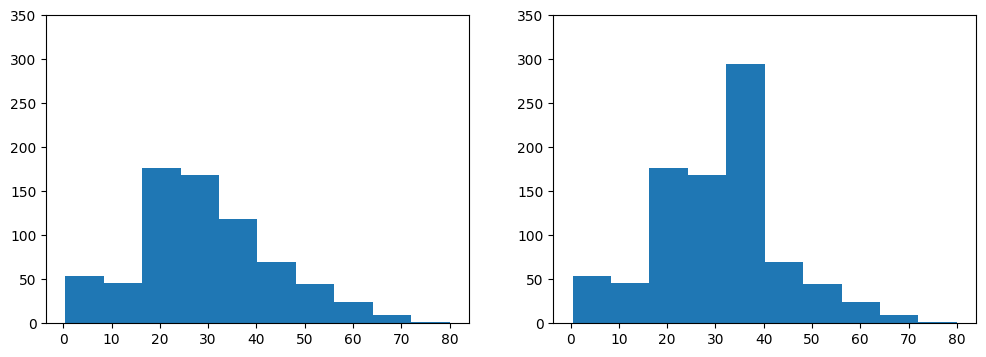

In [642]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(titanic_df['age'])
ax[1].hist(titanic_df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

#### b) Con valores estadísticos

Útil cuando los datos están MCAR o MAR y la distribución es bastante simétrica.

In [643]:
titanic_df['age_2'] = titanic_df['age']
titanic_df['age_2'].fillna(titanic_df['age'].median(), inplace=True)

#titanic_df['age_2'].fillna(titanic_df['age'].mean(), inplace=True)
#titanic_df['age_2'].fillna(titanic_df['age'].mode().iloc[0], inplace=True)

titanic_df[['age', 'age_2']]

,age,age_2
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


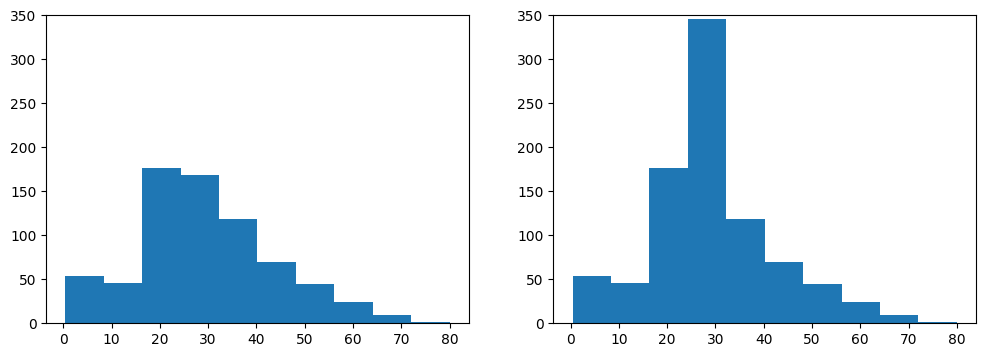

In [644]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(titanic_df['age'])
ax[1].hist(titanic_df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

In [645]:
titanic_df[['age','age_2']].describe()

,age,age_2
count,714.000000,891.000000
mean,29.699118,29.361582
std,14.526497,13.019697
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,28.000000
75%,38.000000,35.000000
max,80.000000,80.000000


#### c) Con el valor anterior o posterior (Forward/Backward Fill)

Útil para datos de *series temporales* con valores consecutivos relacionados.

In [646]:
flights = sns.load_dataset('flights')
flights['month'] = pd.to_datetime(flights['month'], format='%b').dt.month
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str), format='%Y-%m')
flights.head()

,year,month,passengers,date
0,1949,1,112,1949-01-01
1,1949,2,118,1949-02-01
2,1949,3,132,1949-03-01
3,1949,4,129,1949-04-01
4,1949,5,121,1949-05-01


In [647]:
# simulo datos faltantes en 'flights' solo a los efectos de hacer el ejercicio

flights['passengers_original'] = flights['passengers'] # hago una copia (backup) de la columna original

np.random.seed(42)
missing_percentage = 0.25  # 25% de los valores faltantes
n_missing = int(len(flights) * missing_percentage)
missing_indices = np.random.choice(flights.index, size=n_missing, replace=False)
flights.loc[missing_indices, 'passengers'] = np.nan
flights

,year,month,passengers,date,passengers_original
0,1949,1,112.0,1949-01-01,112
1,1949,2,118.0,1949-02-01,118
2,1949,3,132.0,1949-03-01,132
3,1949,4,129.0,1949-04-01,129
4,1949,5,NaN,1949-05-01,121
...,...,...,...,...,...
139,1960,8,606.0,1960-08-01,606
140,1960,9,508.0,1960-09-01,508
141,1960,10,461.0,1960-10-01,461
142,1960,11,390.0,1960-11-01,390


In [648]:
flights.isna().sum()

year                    0
month                   0
passengers             36
date                    0
passengers_original     0
dtype: int64

In [649]:
flights['passengers_2'] = flights['passengers']
flights['passengers_3'] = flights['passengers']

flights['passengers_2'].ffill(inplace=True) # valor anterior
flights['passengers_3'].bfill(inplace=True) # valor posterior

flights[['passengers', 'passengers_2', 'passengers_3']]

,passengers,passengers_2,passengers_3
0,112.0,112.0,112.0
1,118.0,118.0,118.0
2,132.0,132.0,132.0
3,129.0,129.0,129.0
4,NaN,129.0,135.0
...,...,...,...
139,606.0,606.0,606.0
140,508.0,508.0,508.0
141,461.0,461.0,461.0
142,390.0,390.0,390.0


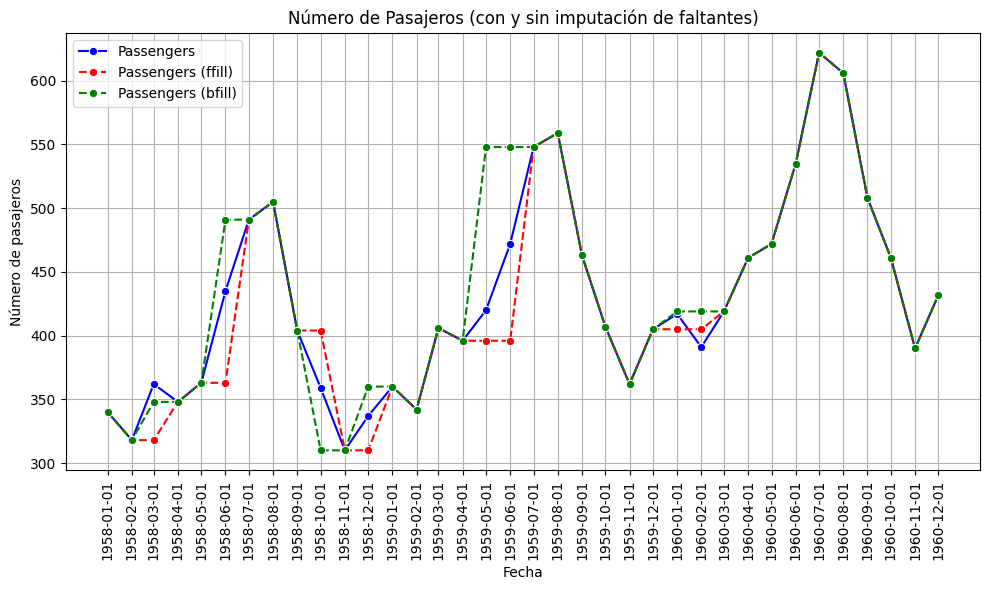

In [650]:
plt.figure(figsize=(10, 6))

data = flights[flights['year']>1957]

sns.lineplot(data=data, x='date', y='passengers_original', errorbar=None, label='Passengers', color='blue', marker='o')
sns.lineplot(data=data, x='date', y='passengers_2', errorbar=None, label='Passengers (ffill)', color='red', linestyle='--', marker='o')
sns.lineplot(data=data, x='date', y='passengers_3', errorbar=None, label='Passengers (bfill)', color='green', linestyle='--', marker='o')

# Agregar etiquetas y título
plt.title('Número de Pasajeros (con y sin imputación de faltantes)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.xticks(ticks=data['date'], rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### d) Imputaciones avanzadas (Cuando tengo datos MNAR o MAR con patrones complejos)
* MICE (Multiple Imputation by Chained Equations)
* KNN (K-Nearest Neighbors)

In [651]:
# Creo una copia reducida del dataset original
titanic_2 = titanic_df[['age', 'pclass', 'sex', 'embarked']].copy() #hacemos una copia reducida del dataset original


In [652]:
titanic_2.head()

,age,pclass,sex,embarked
0,22.0,3,male,S
1,38.0,1,female,C
2,26.0,3,female,S
3,35.0,1,female,S
4,35.0,3,male,S


In [653]:
titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   embarked  889 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [654]:
from statsmodels.imputation import mice
from sklearn.preprocessing import LabelEncoder

In [655]:
# Prerrequisitos para cualquier modelo - Necesitamos hacer encoding de las variables categóricas
le_sex = LabelEncoder() 
le_embarked = LabelEncoder()

# Codificamos las categóricas 
titanic_2['sex'] = le_sex.fit_transform(titanic_2['sex'])
titanic_2['embarked'] = le_embarked.fit_transform(titanic_2['embarked'].fillna(titanic_2['embarked'].mode()[0]))  # Antes de codificar, imputo con la moda, porque esta variable también tiene nulos (solo 2)

titanic_2.head()

,age,pclass,sex,embarked
0,22.0,3,1,2
1,38.0,1,0,0
2,26.0,3,0,2
3,35.0,1,0,2
4,35.0,3,1,2


#### KNN
---

In [656]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [657]:
# Prerequisito para KNNImputer: escalamiento

scaler = MinMaxScaler()
titanic_2_escalado = scaler.fit_transform(titanic_2)


In [658]:
# Definimos el modelo
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Aplicamos la imputación
titanic_escalado_imputado_knn = pd.DataFrame(
    knn_imputer.fit_transform(titanic_2_escalado),
    columns=titanic_2.columns,
    index=titanic_2.index
)

# "Desescalamos" los datos imputados
titanic_imputado_knn = pd.DataFrame(
    scaler.inverse_transform(titanic_escalado_imputado_knn),
    columns=titanic_2.columns,
    index=titanic_2.index
)

# Postprocesamiento del dataset imputado (decodificación)
titanic_imputado_knn['pclass'] = titanic_imputado_knn['pclass'].astype(int)
titanic_imputado_knn['sex'] = le_sex.inverse_transform(titanic_imputado_knn['sex'].astype(int))
titanic_imputado_knn['embarked'] = le_embarked.inverse_transform(titanic_imputado_knn['embarked'].astype(int))
titanic_imputado_knn['age'] = titanic_imputado_knn['age'].clip(lower=0)

print(f"Dataset imputado con KNN (postprocesado):\n {titanic_imputado_knn.head()}")

Dataset imputado con KNN (postprocesado):
     age  pclass     sex embarked
0  22.0       3    male        S
1  38.0       1  female        C
2  26.0       3  female        S
3  35.0       1  female        S
4  35.0       3    male        S


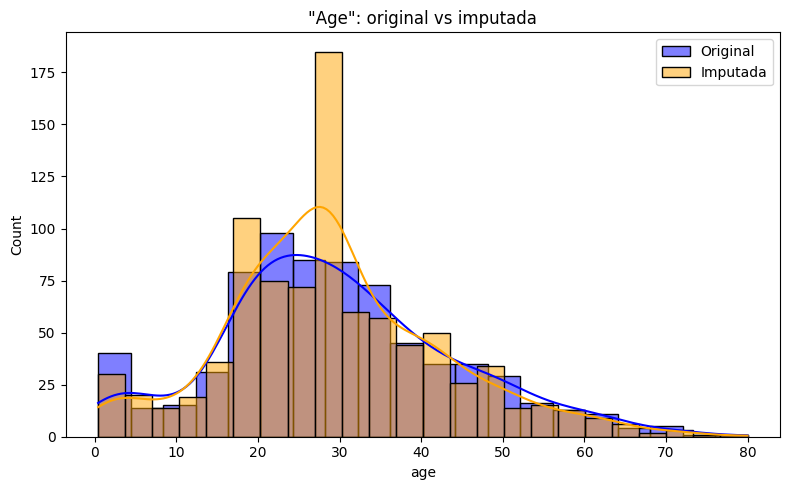

In [659]:
# Visualizar datos originales vs imputados (por ejemplo con el primer dataset imputado)
plt.figure(figsize=(8, 5))

# Age distribution
sns.histplot(titanic_2['age'], label='Original', kde=True, color='blue', alpha=0.5)
sns.histplot(titanic_imputado_knn['age'], label='Imputada', kde=True, color='orange', alpha=0.5)
plt.title('"Age": original vs imputada')
plt.legend()

plt.tight_layout()
plt.show()


#### MICE
---

In [660]:
# Ahora aplicamos MICE

# Definimos el modelo
imp = mice.MICEData(titanic_2)

# Armamos los modelos para imputar
imp.set_imputer('age', formula='C(pclass) + sex + embarked', model_class=sm.OLS) # OLS es el modelo por defecto, hay muchos más



In [661]:
# Aplicar la imputación - generar 10 datasets imputados
imp.update_all(n_iter=10)

# Extraer el dataset imputado resultante (de la última iteración de MICE)
titanic_imp_mice_raw = imp.data.copy()
print(f"Dataset resultante (codificado):\n {titanic_imp_mice_raw.head()}\n\n")

# Este dataset es el que voy a "decodificar" (volver a las variables originales)
titanic_imputado_mice = imp.data.copy()

# Postprocesar el dataset imputado para visualizarlo
titanic_imputado_mice['pclass'] = titanic_imputado_mice['pclass'].astype(int)
titanic_imputado_mice['sex'] = le_sex.inverse_transform(titanic_imputado_mice['sex'].astype(int))
titanic_imputado_mice['embarked'] = le_embarked.inverse_transform(titanic_imputado_mice['embarked'].astype(int))
titanic_imputado_mice['age'] = titanic_imputado_mice['age'].clip(lower=0)

print(f"Dataset imputado y postprocesado:\n {titanic_imputado_mice.head()}")


Dataset resultante (codificado):
     age  pclass  sex  embarked
0  22.0       3    1         2
1  38.0       1    0         0
2  26.0       3    0         2
3  35.0       1    0         2
4  35.0       3    1         2


Dataset imputado y postprocesado:
     age  pclass     sex embarked
0  22.0       3    male        S
1  38.0       1  female        C
2  26.0       3  female        S
3  35.0       1  female        S
4  35.0       3    male        S


Nota: el valor típico de n_iter que se suele utilizar es entre 5 y 20 iteraciones. Se pueden aumentar si el dataset tiene dependencias muy complejas y el porcentaje de faltantes es alto (por ej >30%).

Visualizamos el dataset original y el imputad:

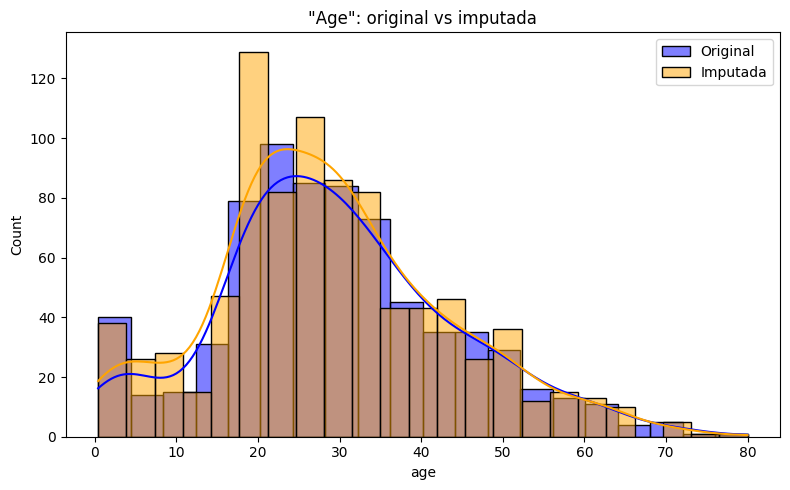

In [662]:

# Visualizar datos originales vs imputados (por ejemplo con el primer dataset imputado)
plt.figure(figsize=(8, 5))

# Age distribution
sns.histplot(titanic_2['age'], label='Original', kde=True, color='blue', alpha=0.5)
sns.histplot(titanic_imputado_mice['age'], label='Imputada', kde=True, color='orange', alpha=0.5)
plt.title('"Age": original vs imputada')
plt.legend()


plt.tight_layout()
plt.show()



Observación: como Statsmodels permite crear múltiples versiones del dataset imputado, por ejemplo:

```python
# Podemos generar distintas versiones del dataset imputado, para hacer un análisis de sensibilidad
titanic_imputados = [titanic_mar_imputado] + [imp.next_sample() for _ in range(4)]
```
Esos datasets se pueden usar luego para hacer un análisis de sensibilidad.